In [1]:
import data
import torch
from torch.utils.data import TensorDataset
import numpy as np
from scipy.stats import entropy, ks_2samp, moment
from scipy import stats

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
import gans.w_gan as wgan
import gans.w_gp_gan as wgpgan
import gans.vae as vae
import gans.ns_gan as nsgan
import gans.mm_gan as mmgan
import gans.ls_gan as lsgan
import gans.dra_gan as dragan
import gans.be_gan as began
from gans.load_data import get_data
from gans.utils import to_var

In [2]:
n=1
size=200
i = 0
j = 0
distributions = ['normal', 'beta', 'exponential', 'gamma', 'gumbel', 'laplace']
pdfs = ['uniform', 'random']

In [3]:
generator = data.Distribution(distributions[i], size) 
moment(generator.generate_samples(500).T, moment=2)[0:5]

array([ 1.07798869,  0.48027856,  0.76042847,  3.82580822,  3.16853426])

In [4]:
def get_pdf(data):
    x = []
    for i in range(data.shape[0]):
        x.append(list(np.histogram(data[i], bins=100, density=True)[0]))
    df = pd.DataFrame(x)
    pdf = list(df.mean(axis=0))
    return pdf


def preprocess(generator, samples, BATCH_SIZE = 100):
    data_train = torch.from_numpy(generator.generate_samples(samples)).float()
    data_val = torch.from_numpy(generator.generate_samples(samples)).float()
    data_test = torch.from_numpy(generator.generate_samples(samples)).float()
    labels_train = torch.from_numpy(np.zeros((samples,1)))
    train = TensorDataset(data_train, labels_train)
    val =TensorDataset(data_val, labels_train)
    test = TensorDataset(data_test, labels_train)
    train_iter = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
    val_iter = torch.utils.data.DataLoader(val, batch_size=BATCH_SIZE, shuffle=True)
    test_iter = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=True)
    return train_iter, val_iter, test_iter

# Multivariate Distributions Example

In [ ]:
# generator = data.Distribution(distributions[i], 200)
# generator.save_dist('output_file.pickle')  # Saving the generator

# Mixture Models Example

In [ ]:
# generator = data.MixtureDistribution(distributions[i], distributions[j], n_mixtures=15, dim=200)
# generator.get_log_likelihood(data_train)
# generator.save_dist()

# Circles Example

In [ ]:
# generator = data.CirclesDatasetGenerator(size=256, n_circles=4, random_colors=True, random_sizes=True, modes=20)
# x = generator.generate_samples(10000)
# print(len(x))
# print(x[0].shape)
# generator.generate_samples_to_directory(5000, './dataset_1')
# generator.save_generator('./generator1.pickle')

# MNIST Data

In [ ]:
# train_iter, val_iter, test_iter = get_data()

In [ ]:
# train_iter.dataset.data_tensor.shape

# Preprocessing Synthetic Data

In [ ]:
i=0
# gen = data.Distribution(distributions[i], size) 

In [ ]:
# train_iter, val_iter, test_iter = preprocess(generator, 10000)

In [ ]:
# train_iter.dataset.data_tensor.shape

# Controlled Experiments on GANs

## 1. Divergence Measures between Distributions

#### Measuring divergence between Synthetic Data and GAN Data with the following metrics: KL Divergences, Jensen-Shannon Divergence, Optimal Tranport Distance, Wasserstein Distance, Energy Distance, Total Variation Distance


# KS Stat, KL Divergence, JS Divergence

In [ ]:
# Example with WGAN
ks_dist = []
kl_dist = []
js_epoch = []
the_dist = []

res = {}
# Also loop over mixture models and circles
# Also loop over GANs
for dist in distributions[0:5]:
    res[dist]={}
    gen = data.Distribution(dist,size)
    train_iter, val_iter, test_iter = preprocess(gen, 10000)
    i = 10
    model = wgan.GAN(image_size = size, hidden_dim = 256, z_dim = size/4)
    if torch.cuda.is_available():
        model = model.cuda()
    trainer = wgan.Trainer(train_iter, val_iter, test_iter)
    model, kl, ks, js = trainer.train(model = model, num_epochs = i, G_lr = 5e-5, D_lr = 5e-5, D_steps = 5, clip = 0.01)
    the_dist.append(dist)
    res[dist]["kl"] = kl
    res[dist]["ks"] = ks
    res[dist]["js"] = js

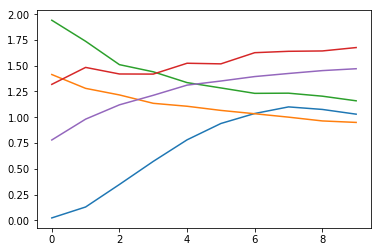

In [21]:
normal = pd.DataFrame(res['normal'])
beta = pd.DataFrame(res['beta'])
exponential = pd.DataFrame(res['exponential'])
gamma = pd.DataFrame(res['gamma'])
gumbel = pd.DataFrame(res['gumbel'])

plt.plot(range(10),normal.kl)
plt.plot(range(10),beta.kl)
plt.plot(range(10),exponential.kl)
plt.plot(range(10),gamma.kl)
plt.plot(range(10),gumbel.kl)

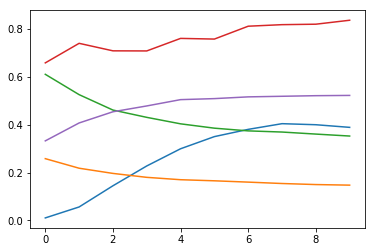

In [22]:
plt.plot(range(10),normal.js)
plt.plot(range(10),beta.js)
plt.plot(range(10),exponential.js)
plt.plot(range(10),gamma.js)
plt.plot(range(10),gumbel.js)

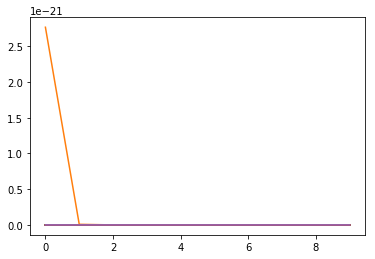

In [23]:
plt.plot(range(10),normal.ks)
plt.plot(range(10),beta.ks)
plt.plot(range(10),exponential.ks)
plt.plot(range(10),gamma.ks)
plt.plot(range(10),gumbel.ks)

## 2. Empirical Analysis of Mode Collapse

#### Three methods to measure mode collapse Inception Score, MODE Score, Frechet Inception Distance

## 3. Empirical Evaluation of Performance with varying Information Geometry

## 4. Evaluation of Empirical Sample Complexity

In [ ]:
n = 1

# WGAN

In [ ]:
model = wgan.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = wgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 5e-5, D_lr = 5e-5, D_steps = 5, clip = 0.01)

# WGAN GP

In [ ]:
model = wgpgan.GAN(image_size = size, hidden_dim = 256, z_dim = 128) 
if torch.cuda.is_available():
    model = model.cuda()
trainer = wgpgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 5)

# VAE

In [ ]:
model = vae.VAE(image_size = size, hidden_dim = 400, z_dim = 20)
if torch.cuda.is_available():
    model.cuda()
trainer = vae.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model, num_epochs = n)

# # Explore latent space
# viz = vae.Viz(train_iter, val_iter, test_iter, model)
# viz.make_all()

# NS GAN

In [ ]:
model = nsgan.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = nsgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 2e-4, D_lr = 2e-4, D_steps = 1)

# MM GAN

In [ ]:
model = mmgan.GAN(image_size = size, hidden_dim = 400, z_dim = 100)
if torch.cuda.is_available():
    model = model.cuda()
trainer = mmgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 2e-4, D_lr = 2e-4, G_init = 5, D_steps = 1)

# LS GAN

In [ ]:
model = lsgan.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = lsgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)

# DRA GAN

In [ ]:
model = dragan.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = dragan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)

# BE GAN

In [ ]:
model = began.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = began.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)